In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
Loan=pd.read_csv('C:/Users/USER/Downloads/archive (11)/LoanApprovalPrediction.csv')
Loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#First few rows of the data
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Last few rows of the data
Loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
597,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
#Check/handling missing values
Loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#4 columns have missing values which could cause inflation of our results
#They therefore need to be handled
Loan['Dependents'].median()

0.0

In [40]:
#We impute the missing Dependent values with 0.0(median value)
Loan['Dependents'].fillna(Loan['Dependents'].median(), inplace=True)

In [41]:
#We impute the missing LoanAmount values with the median value
Loan['LoanAmount'].fillna(Loan['LoanAmount'].median(), inplace=True)

In [42]:
#We impute the missing Loan_Amount_term values with the median value
Loan['Loan_Amount_Term'].fillna(Loan['Loan_Amount_Term'].median(), inplace=True)

In [43]:
#We impute the missing Credit_History data
Loan['Credit_History'].fillna(Loan['Credit_History'].median(), inplace=True)

In [44]:
#Checking for duplicated values
Loan.duplicated().sum().sum()
#No duplicates in our dataset

0

In [45]:
#Converting the categorical variables into numerical ones for easier analysis
from sklearn.preprocessing import LabelEncoder
#Initialising LabelEncoder
labelencoder=LabelEncoder()
Loan['Property_Area']= labelencoder.fit_transform(Loan['Property_Area'])
Loan['Property_Area']

0      2
1      0
2      2
3      2
4      2
      ..
593    0
594    0
595    2
596    2
597    1
Name: Property_Area, Length: 598, dtype: int64

In [46]:
#Convert the categorical variables into numerical ones 
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
Loan['Education']= labelencoder.fit_transform(Loan['Education'])
Loan['Education']

0      0
1      0
2      0
3      1
4      0
      ..
593    0
594    0
595    0
596    0
597    0
Name: Education, Length: 598, dtype: int64

In [47]:
#Doing the same to the Self_Employed column
Loan['Self_Employed']=labelencoder.fit_transform(Loan['Self_Employed'])
Loan['Self_Employed']

0      0
1      0
2      1
3      0
4      0
      ..
593    0
594    0
595    0
596    0
597    1
Name: Self_Employed, Length: 598, dtype: int64

In [48]:
#First few rows of the modified dataset
Loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,0,0,5849,0.0,127.0,360.0,1.0,2,1
1,LP001003,Male,Yes,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,Yes,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,Yes,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,No,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


Text(0.5, 1.0, 'Distribution of Gender')

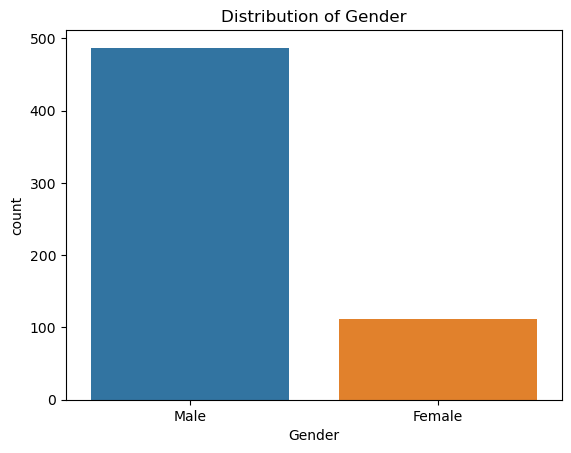

In [49]:
#Univariate analysis
sns.countplot(data=Loan, x='Gender')
plt.title('Distribution of Gender')
#Male applicants are more compared to female        

Text(0.5, 1.0, 'Marital status distribution')

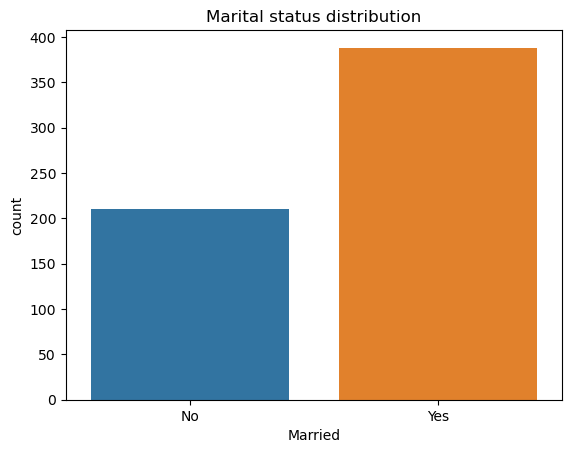

In [50]:
#Marital status of the applicants
sns.countplot(data=Loan, x='Married')
plt.title('Marital status distribution')
#Majority of the applicants are married

Text(0.5, 1.0, 'Education distribution')

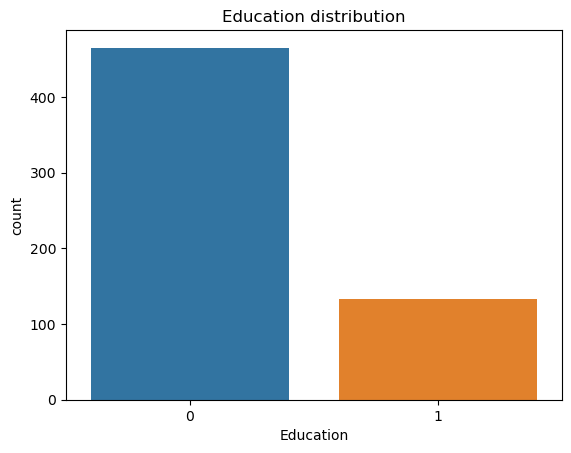

In [51]:
#Education of the applicants analysis
sns.countplot(data=Loan, x='Education')
plt.title('Education distribution')
#Majority of the applicants are graduates

Text(0.5, 1.0, 'Credit_History distribution')

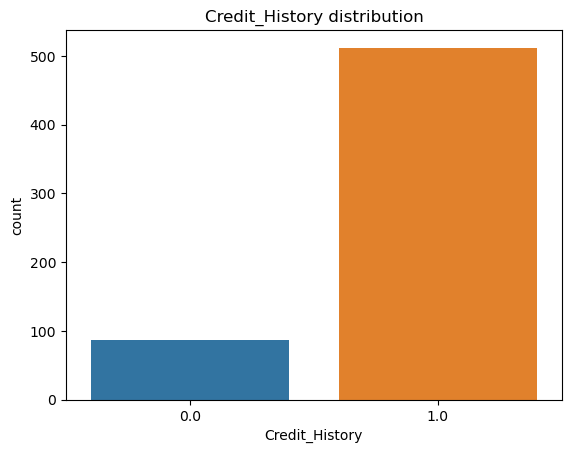

In [52]:
#Credit history of the applicants
sns.countplot(data=Loan, x='Credit_History')
plt.title('Credit_History distribution')
#Assuming that 0.0 represents a negative credit history and 1.0 represents a positive credit history, then majority of the applicants have a positive credit history

Text(0.5, 1.0, 'Applicant property distribution')

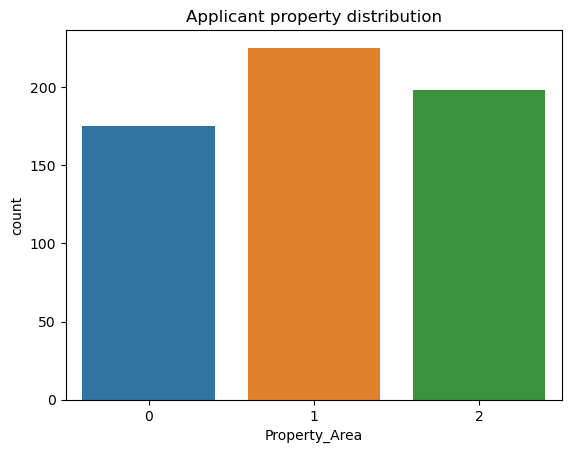

In [53]:
#Property_Area distribution
sns.countplot(data=Loan, x='Property_Area')
plt.title('Applicant property distribution')
#0=Urban, 1=Semiurban, 2=Rural, Hence majority of the applicants Property is at the Semiurban, then Rural and least at the Urban

In [54]:
Loan['Loan_Status']= labelencoder.fit_transform(Loan['Loan_Status'])
Loan['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 598, dtype: int64

Text(0.5, 1.0, 'Loan_Status distribution')

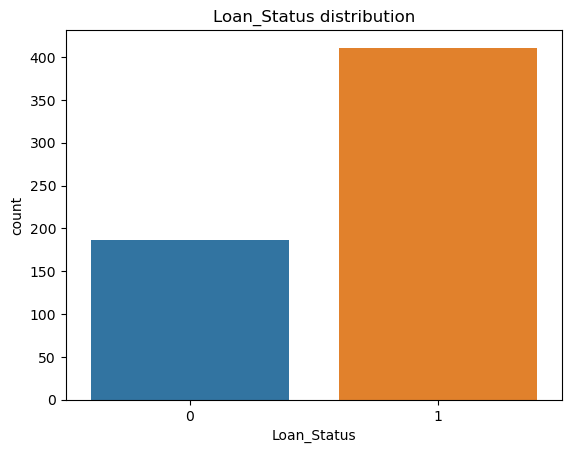

In [55]:
#Visualizing the Loan_Status distribution
sns.countplot(data=Loan, x='Loan_Status')
plt.title('Loan_Status distribution')
#Majority of the applicants loan status is Late, encoded as 1

Text(0.5, 1.0, 'Relationship between Gender and LoanAmount')

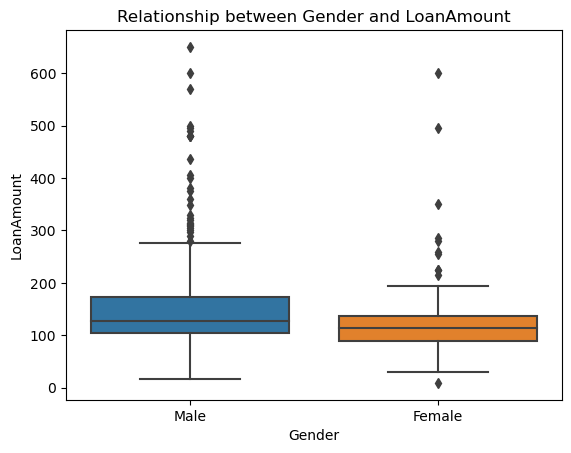

In [56]:
#Bivariate analysis
#Realtionship between Gender and LoanAmount
sns.boxplot(data= Loan, x='Gender', y='LoanAmount')
plt.title('Relationship between Gender and LoanAmount')
#Males have a higher amount borrowed compared to females

Text(0.5, 1.0, 'Relationship between Married and LoanAmount')

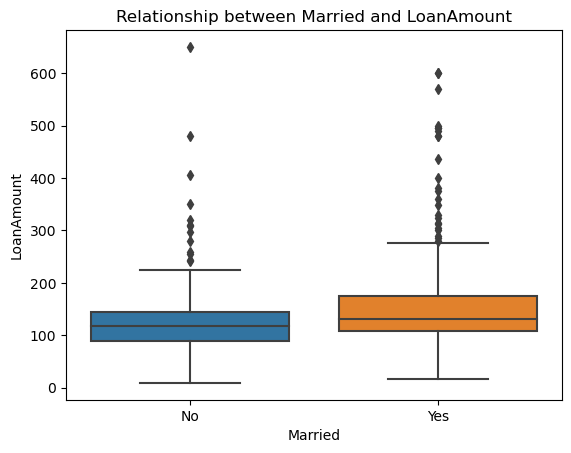

In [57]:
#Relationship between Married and LoanAmount
sns.boxplot(data=Loan, x='Married', y= 'LoanAmount')
plt.title('Relationship between Married and LoanAmount')

Text(0.5, 1.0, 'Relationship between loan status and credit history')

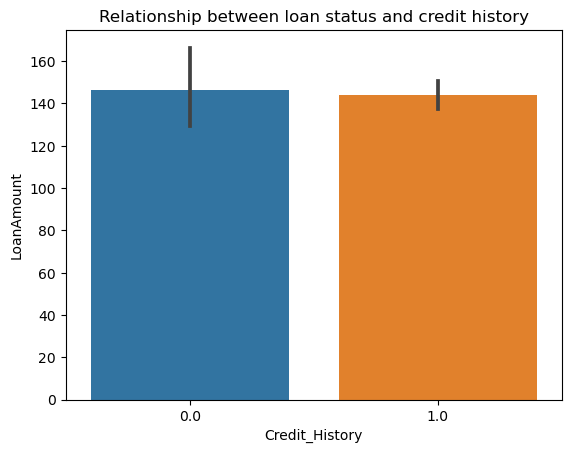

In [100]:
#Relationship between loan status and credit history
sns.barplot(data=Loan, x='Credit_History', y='LoanAmount')
plt.title('Relationship between loan status and credit history')

Text(0.5, 1.0, 'Relationship between Education and LoanAmount')

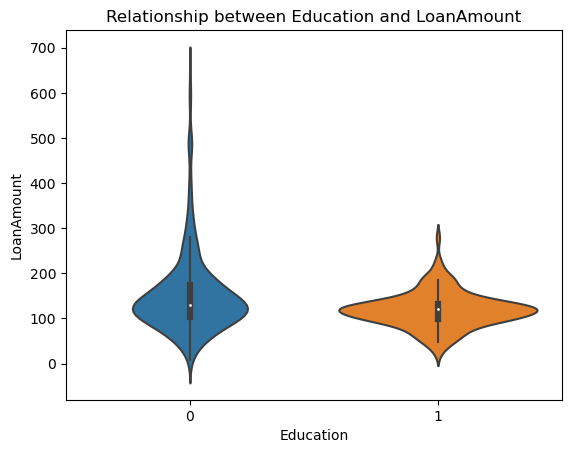

In [86]:
#Relationship between Education and LoanAmount
sns.violinplot(data=Loan, x='Education', y='LoanAmount')
plt.title('Relationship between Education and LoanAmount')

Text(0.5, 1.0, 'Relationship between Education and Loan_Amount_Term')

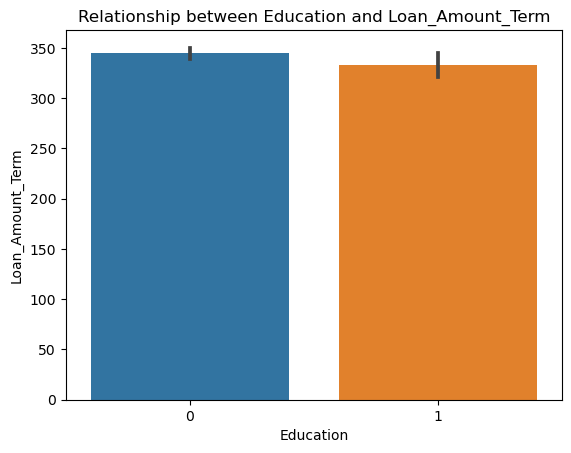

In [60]:
#Relationship between Education and Loan_Amount_Term
sns.barplot(data=Loan, x='Education',y='Loan_Amount_Term')
plt.title('Relationship between Education and Loan_Amount_Term')

Text(0.5, 1.0, 'Relationship between Self_Employed and ApplicantIncome')

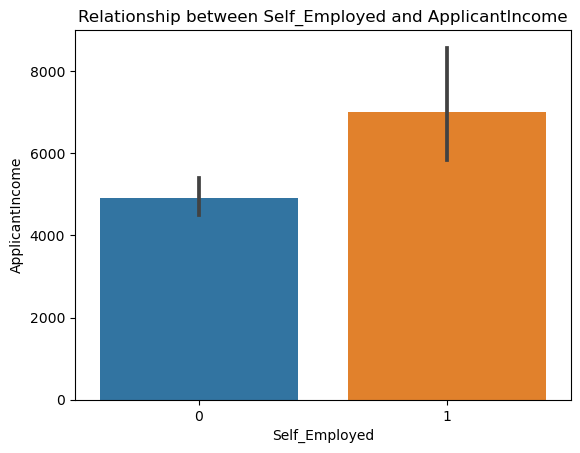

In [61]:
#Relationship between Self_Employed and ApplicantIncome
sns.barplot(data=Loan, x='Self_Employed', y='ApplicantIncome')
plt.title('Relationship between Self_Employed and ApplicantIncome')

Text(0.5, 1.0, 'Relationship between Dependents and LoanAmount')

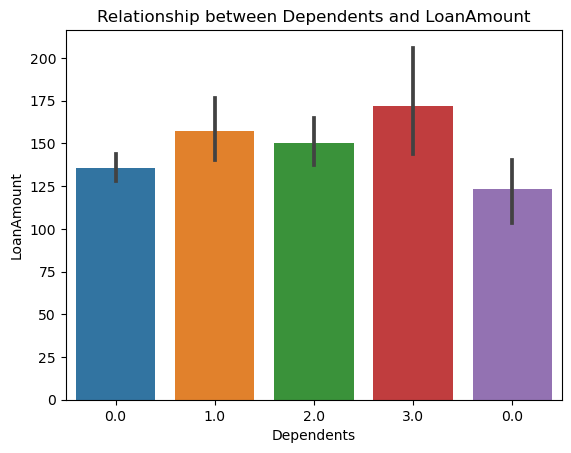

In [102]:
#Relationship between Dependents and LoanAmount
sns.barplot(data=Loan, x='Dependents', y='LoanAmount')
plt.title('Relationship between Dependents and LoanAmount')

In [75]:
#Relationship between Loan_Status and Education
pd.crosstab(Loan['Loan_Status'], Loan['Education'])

Education,0,1
Loan_Status,,
0,136,51
1,329,82


In [76]:
#Relationship between Education and Credit_History
pd.crosstab(Loan['Education'], Loan['Credit_History'])

Credit_History,0.0,1.0
Education,,
0,61,404
1,25,108


Text(0.5, 1.0, 'Relationship between LoanAmount and Loan_Amount_Term')

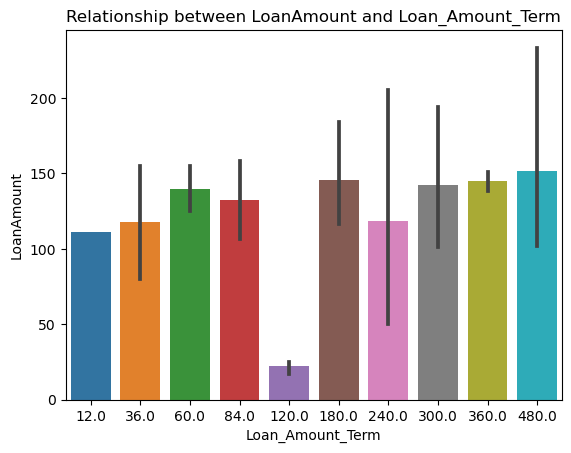

In [85]:
#Relationship between LoanAmount and Loan_Amount_Term
sns.barplot(data=Loan, x='Loan_Amount_Term', y='LoanAmount')
plt.title('Relationship between LoanAmount and Loan_Amount_Term')

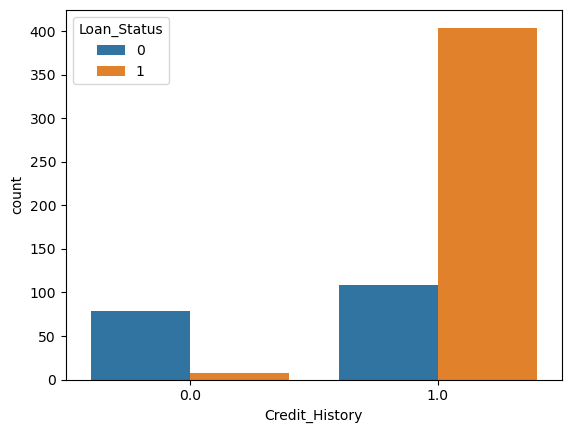

In [87]:
#Relationship between Credit_History and Loan_Status
sns.countplot(data=Loan, x='Credit_History', hue='Loan_Status' )
plt.show()

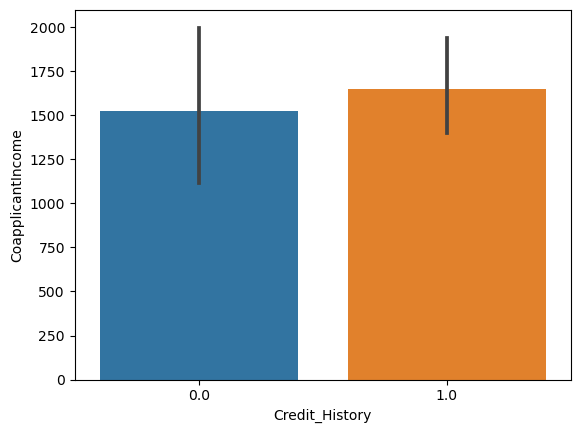

In [94]:
#Realtionship between CoapplicantIncome and Credit_History
sns.barplot(data=Loan, x='Credit_History', y='CoapplicantIncome', estimator=np.mean)
plt.show()

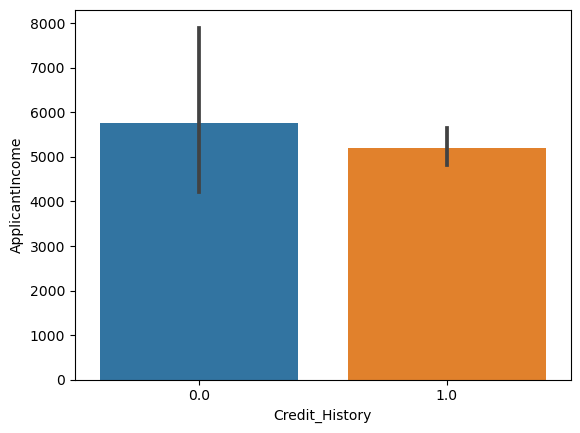

In [95]:
#Relationship between ApplicantIncome and Credit_History
sns.barplot(data=Loan, x='Credit_History', y='ApplicantIncome', estimator=np.mean)
plt.show()

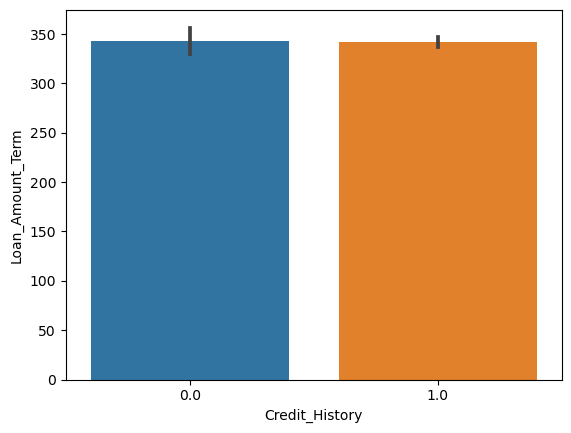

In [99]:
#Relationship between Credit_History and Loan_Amount_Term
sns.barplot(data=Loan, x='Credit_History', y='Loan_Amount_Term')
plt.show()

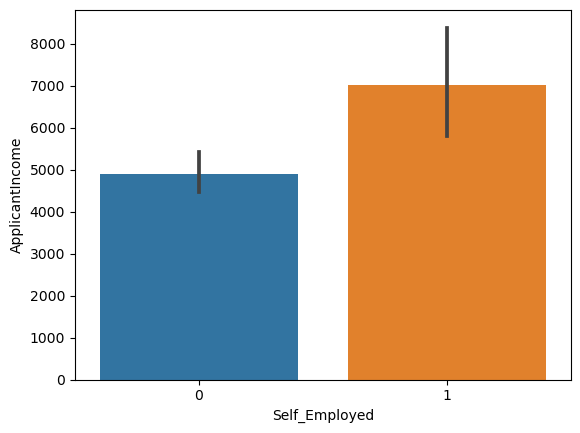

In [101]:
#Relationship between Self_Employed and ApplicantIncome
sns.barplot(data=Loan, x='Self_Employed', y='ApplicantIncome')
plt.show()
#Majority are not self employed. Their income is less compared to those who are self employed

In [104]:
#Having conducted Exploratory Data Analysis, I split my dataset into train and test data
from sklearn.model_selection import train_test_split

In [106]:
#Split into train and test sets
x=Loan.drop('Loan_Status',axis=1)
y=Loan['Loan_Status']

In [110]:
#Split the data into 80% training and 20% testing sets
x_train, x_test ,y_train ,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [111]:
#Choose a machine learning algorithm
#I choose Logistic Regression
from sklearn.linear_model import LogisticRegression

In [112]:
#Initialize the model
model=LogisticRegression()

In [116]:
print(Loan.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


In [117]:
#I drop Loan_ID since I do not need it for modelling
Loan=Loan.drop(['Loan_ID'], axis=1)

In [118]:
# Encode categorical variables using Label Encoding for binary and One-Hot for multiple categories
le = LabelEncoder()

In [120]:
# Encode binary categorical variables
Loan['Gender'] = le.fit_transform(Loan['Gender'])

In [121]:
#Encode binary categorical variables
Loan['Married'] = le.fit_transform(Loan['Gender'])

In [123]:
# For 'Dependents', which may have multiple categories, you can use One-Hot Encoding
Loan = pd.get_dummies(Loan, columns=['Dependents'], drop_first=True)

In [129]:
# Split the dataset into features and target variable
x = Loan.drop('Loan_Status', axis=1)  # Replace with your target variable name
y = Loan['Loan_Status']


In [130]:
# Perform the train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [136]:
# Predict on the test set
#Error realised so I have to load the data once again,split it into train and test datafrom sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report
#Load the data
Loan=pd.read_csv('C:/Users/USER/Downloads/archive (11)/LoanApprovalPrediction.csv')
Loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [137]:
#drop Loan_ID if it is not needed for modelling
Loan= Loan.drop(['Loan_ID'], axis=1)

In [146]:
# Split the data into features and target variable
# Note: Ensure 'Loan_Status' is your target variable
x = Loan.drop('Loan_Status', axis=1)  
y = Loan['Loan_Status']

In [147]:
# Combine X and y to maintain consistent feature columns
combined = pd.concat([x, y], axis=1)

In [148]:
# Handle missing values
combined['Gender'].fillna(combined['Gender'].mode()[0], inplace=True)
combined['Married'].fillna(combined['Married'].mode()[0], inplace=True)


In [145]:
# Encode binary categorical variables
le = LabelEncoder()
combined['Gender'] = le.fit_transform(combined['Gender'])
combined['Married'] = le.fit_transform(combined['Married'])

In [149]:
# Now split the combined dataset back into X and y
x_final = combined.drop('Loan_Status', axis=1)
y_final = combined['Loan_Status']

In [150]:
# Perform the train-test split
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.2, random_state=42)

In [151]:
# Fit your model on the training set
from sklearn.ensemble import RandomForestClassifier

In [152]:
#Initialize
model = RandomForestClassifier()

In [153]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [154]:
# Make predictions
predictions = model.predict(X_test)

In [155]:
# Output feature names for debugging
print("Training Features:", X_train.columns)
print("Testing Features:", X_test.columns)

Training Features: Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Dependents_1.0', 'Dependents_2.0', 'Dependents_3.0',
       'Dependents_0.0'],
      dtype='object')
Testing Features: Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Dependents_1.0', 'Dependents_2.0', 'Dependents_3.0',
       'Dependents_0.0'],
      dtype='object')


In [157]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7916666666666666


In [158]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[15 20]
 [ 5 80]]


In [159]:
# Classification Report
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           N       0.75      0.43      0.55        35
           Y       0.80      0.94      0.86        85

    accuracy                           0.79       120
   macro avg       0.78      0.68      0.71       120
weighted avg       0.79      0.79      0.77       120



In [174]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.7682352941176471


In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [166]:
# Initialize Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

In [167]:
# Fit Grid Search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [168]:
# Fit Grid Search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [169]:
# Use the best estimator
best_model = grid_search.best_estimator_


In [170]:
# Train on the full training set
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [171]:
import joblib

In [172]:
# Save the model
joblib.dump(best_model, 'loan_approval_model.pkl')

['loan_approval_model.pkl']